In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier




In [65]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [66]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
euclidian_distance(x, y)

[[0.07448528 0.65807548]]
[[0.82073532 0.75401871]]


array([0.75239234])

In [67]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            print("Coloque el código de distancia aquí")

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

In [68]:

# Lee el archivo CSV y almacena los datos en un DataFrame
df = pd.read_csv("weatherAUS.csv")
# Obtener los nombres de las columnas
nombres_columnas = df.columns
# Convertir los nombres de las columnas en una lista si es necesario
nombres_columnas_lista = nombres_columnas.tolist()

# Reemplazar los valores NaN por 0 en todo el DataFrame
df = df.fillna(0)

C:\Users\arman\AppData\Local\Temp\ipykernel_15432\2198972372.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("weatherAUS.csv")


In [69]:
# Lista de valores de referencia
valores_Dir = ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']

# Función para mapear los valores a sus índices
def mapear_a_indices(valor):
    if valor in valores_Dir:
        return valores_Dir.index(valor)+1
    else:
        return valor  # Mantener el valor original si no está en la lista

# Aplicar la función al DataFrame
df = df.applymap(mapear_a_indices)

# Utilizar replace() para cambiar los valores
df = df.replace({'No': 0, 'Yes': 1})

# Reemplazar 'NAd' y 'NAN' por 0 en todo el DataFrame
df = df.replace(['NAd', 'NAN'], 0)
# Utilizar pd.to_numeric() para convertir los valores a números
df['Evaporation'] = pd.to_numeric(df['Evaporation'], errors='coerce')
df = df.drop(columns=['Date'])

In [70]:
cantidad_total_no_numericos = 0

for columna in df.columns:
    cantidad_no_numericos_columna = df[columna].apply(lambda x: not isinstance(x, (int, float))).sum()
    cantidad_total_no_numericos += cantidad_no_numericos_columna
    if cantidad_no_numericos_columna > 0:
        print(f"En la columna '{columna}' hay {cantidad_no_numericos_columna} datos no numéricos")

print(f"Total de datos no numéricos en el conjunto de datos: {cantidad_total_no_numericos}")

En la columna 'Location' hay 145460 datos no numéricos
Total de datos no numéricos en el conjunto de datos: 145460


In [71]:
df.drop(columns=['Location'], inplace=True)

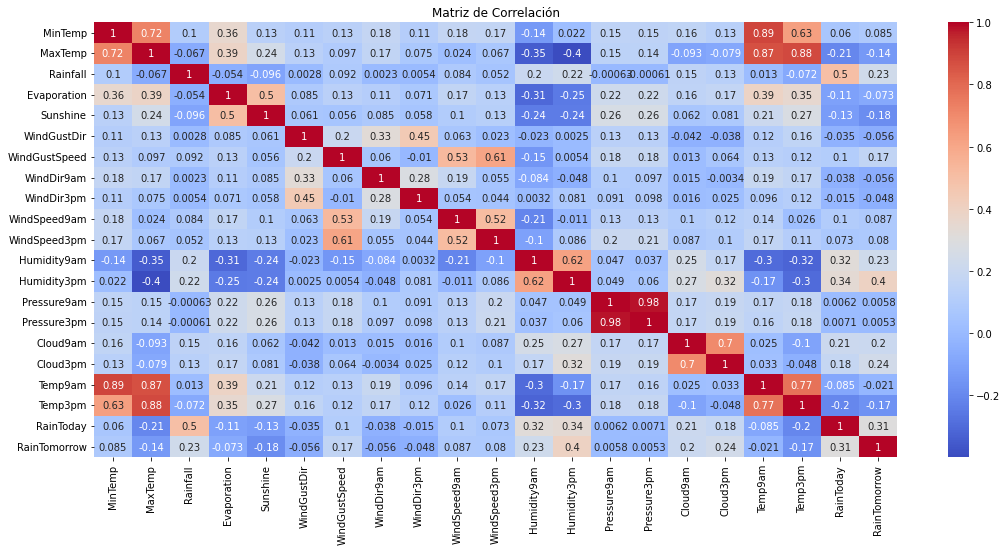

In [72]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Especificar el tamaño de la figura
plt.figure(figsize=(18, 8))

# Crear una visualización de la matriz de correlación utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [73]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [74]:
X.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,0.0,0.0,1,44.0,1,2,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,7.4,25.1,0.0,0.0,0.0,2,44.0,5,3,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,12.9,25.7,0.0,0.0,0.0,3,46.0,1,3,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,0.0,0.0,4,24.0,13,15,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,17.5,32.3,1.0,0.0,0.0,1,41.0,9,12,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
5,14.6,29.7,0.2,0.0,0.0,2,56.0,1,1,19.0,24.0,55.0,23.0,1009.2,1005.4,0.0,0.0,20.6,28.9,0
6,14.3,25.0,0.0,0.0,0.0,1,50.0,8,1,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,0.0,18.1,24.6,0
7,7.7,26.7,0.0,0.0,0.0,1,35.0,10,1,6.0,17.0,48.0,19.0,1013.4,1010.1,0.0,0.0,16.3,25.5,0
8,9.7,31.9,0.0,0.0,0.0,5,80.0,13,12,7.0,28.0,42.0,9.0,1008.9,1003.6,0.0,0.0,18.3,30.2,0
9,13.1,30.1,1.4,0.0,0.0,1,28.0,11,10,15.0,11.0,58.0,27.0,1007.0,1005.7,0.0,0.0,20.1,28.2,1


In [75]:
y.value_counts()

RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

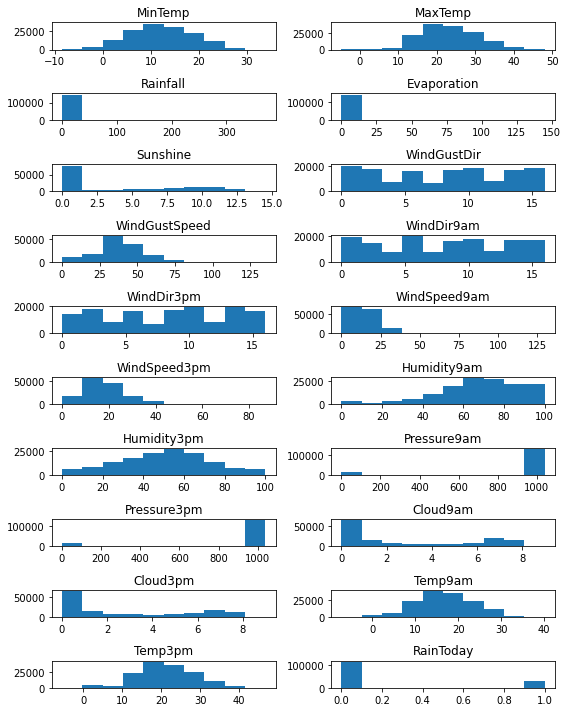

In [76]:
# Obtener el número de columnas en el DataFrame
num_columnas = len(X.columns)

# Definir el número de filas y columnas en la imagen de los histogramas
num_filas = (num_columnas + 1) // 2  # Divide las columnas en 2 filas
num_columnas = 2  # Dos histogramas por fila

# Crear una figura de Matplotlib
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 10))

# Iterar a través de las columnas del DataFrame y trazar los histogramas
for i, columna in enumerate(X.columns):
    fila_actual = i // num_columnas
    columna_actual = i % num_columnas
    axs[fila_actual, columna_actual].hist(df[columna], bins=10)
    axs[fila_actual, columna_actual].set_title(columna)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar la imagen con los histogramas
plt.show()



In [77]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

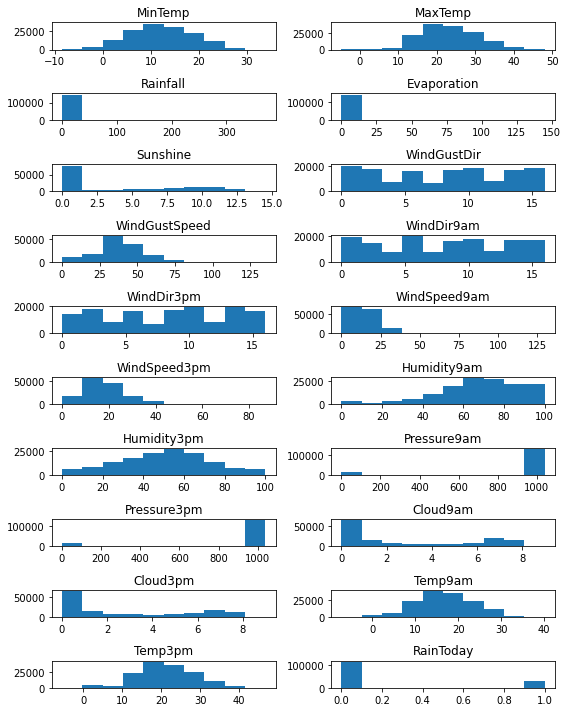

In [78]:
# Obtener el número de columnas en el DataFrame
num_columnas = len(X.columns)

# Definir el número de filas y columnas en la imagen de los histogramas
num_filas = (num_columnas + 1) // 2  # Divide las columnas en 2 filas
num_columnas = 2  # Dos histogramas por fila

# Crear una figura de Matplotlib
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 10))

# Iterar a través de las columnas del DataFrame y trazar los histogramas
for i, columna in enumerate(X.columns):
    fila_actual = i // num_columnas
    columna_actual = i % num_columnas
    axs[fila_actual, columna_actual].hist(df[columna], bins=10)
    axs[fila_actual, columna_actual].set_title(columna)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar la imagen con los histogramas
plt.show()

In [79]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=45)

In [81]:
our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=30)

In [82]:
our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)


In [ ]:
pd.DataFrame([[our_accuracy]],
             ['Accuracy'],    
             ['Our Implementation'])

Cosas arreglados en el set de Datos:

1. Hay valores como NAN, por lo que se pasaron a un valor de 0.
2. Los valores "No" se pasaron a 0 y los valores "Yes" a 1.
3. Las direcciones se pasaron a un equivalente numerico de 1 a 16.
4. Existen valores numericos como Strings por lo cual se pasaron a numerico.